In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [20]:
prop = 'density'        # density, temp, grains, or LAPs
site = 'KPS'            # site name corresponding to site_constants.csv
glacier = 'kahiltna'    # glacier name corresponding to glacier_metadata.csv
fp_out = f'../../data/by_glacier/{glacier}/{prop}/'
if not os.path.exists(fp_out):
    os.mkdir(fp_out)
fn_out = fp_out + f'{glacier}{site}{prop}.csv'

input_fp = '../../../../CommunityFirnModel/Data/cores/kahiltna/'
input_fns = ['kahiltnaKPS_2025_05_23.csv','kahiltnaKPS_2024_05_26.csv']
dfs = []
max_depth = 0
for fn in input_fns:
    dfs.append(pd.read_csv(input_fp + fn))
    max_depth = max(max_depth, max(dfs[-1]['SBD']))

In [23]:
depth_interp = np.arange(0.1, max_depth, 0.1)
density_interp = []
for df in dfs:
    df['depth'] = df['SBD'] + df['length'] / 2
    density = np.interp(depth_interp, df['depth'].values, df['density'].values)
    density_interp.append(density)
density_interp = np.mean(np.array(density_interp), axis=0)

In [24]:
df_out = pd.DataFrame({'depth':depth_interp, 'density':density_interp})
df_out.to_csv(fn_out)
print('Saved to',fn_out)
print(df_out)

Saved to ../../data/by_glacier/kahiltna/density/kahiltnaKPSdensity.csv
     depth     density
0      0.1  165.051760
1      0.2  192.093685
2      0.3  261.001553
3      0.4  267.471532
4      0.5  260.059524
..     ...         ...
158   15.9  596.804167
159   16.0  590.687233
160   16.1  584.570299
161   16.2  579.677618
162   16.3  582.003808

[163 rows x 2 columns]


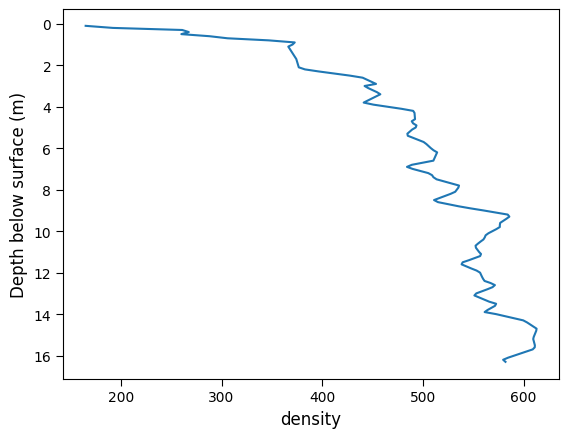

In [26]:
fig, ax = plt.subplots()
ax.plot(df_out[prop], df_out['depth'])
ax.invert_yaxis()
ax.tick_params(length=5)
ax.set_ylabel('Depth below surface (m)', fontsize=12)
ax.set_xlabel(prop, fontsize=12)
plt.show()